In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import mlxtend as mx
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, fbeta_score, roc_auc_score, roc_curve, precision_recall_curve, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV, KFold
import optuna
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

In [178]:
path = "C:\\Users\\ssriv\\Warlord\\data mining individual\\dataset\\CDC Diabetes Dataset.csv"

# Dataset scale description

### Code,Age Range

1,18 – 24

2,25 – 29

3,30 – 34

4,35 – 39

5,40 – 44

6,45 – 49

7,50 – 54

8,55 – 59

9,60 – 64

10,65 – 69

11,70 – 74

12,75 – 79

13,80 or older

14,Don't know / Missing (Usually excluded)






### Code,Education Level,Meaning

1,Never attended / Kindergarten only,No formal schooling.

2,Grades 1 through 8,Elementary/Middle school only.

3,Grades 9 through 11,"Some high school, but did not graduate."

4,Grade 12 or GED,High school graduate.

5,College 1 to 3 years,Some college or technical school.

6,College 4 years or more,College graduate (Bachelor's and up).

9,Refused / Missing,






### Code,Income Bracket

1,"Less than $10,000"

2,"$10,000 to less than $15,000"

3,"$15,000 to less than $20,000"

4,"$20,000 to less than $25,000"

5,"$25,000 to less than $35,000"

6,"$35,000 to less than $50,000"

7,"$50,000 to less than $75,000"

8,"$75,000 or more"

77/99,Don't know / Refused (Very common in income data)

In [179]:
df_import = pd.read_csv(path)

In [180]:
df_import

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [181]:
df_import["Income"].value_counts()

Income
8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: count, dtype: int64

In [182]:
df_import['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [183]:
df_import.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [184]:
df_import.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [185]:
df_import.duplicated().sum()

23899

In [186]:
df_import = df_import.drop_duplicates()

In [187]:
df_import.duplicated().sum()

0

In [188]:
df_import.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [189]:
df_import["Diabetes_012"].value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

In [190]:

df_import["health_burden"] = (
    df_import["HighBP"] +
    df_import["HighChol"] +
    df_import["HeartDiseaseorAttack"] +
    df_import["Stroke"]
)


C:\Users\ssriv\AppData\Local\Temp\ipykernel_32816\87284035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_import["health_burden"] = (


In [191]:
df_import["lifestyle_risk"] = (
    df_import["Smoker"] +
    (1 - df_import["PhysActivity"]) +
    (1 - df_import["Fruits"]) +
    (1 - df_import["Veggies"]) +
    df_import["HvyAlcoholConsump"]
)


C:\Users\ssriv\AppData\Local\Temp\ipykernel_32816\1306267563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_import["lifestyle_risk"] = (


In [192]:
df_import["phys_mental_ratio"] = (
    df_import["PhysHlth"] / (df_import["MentHlth"] + 1)
)


C:\Users\ssriv\AppData\Local\Temp\ipykernel_32816\4232696580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_import["phys_mental_ratio"] = (


In [193]:
df_import["care_access"] = (
    df_import["AnyHealthcare"] +
    df_import["CholCheck"] -
    df_import["NoDocbcCost"]
)


C:\Users\ssriv\AppData\Local\Temp\ipykernel_32816\424572091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_import["care_access"] = (


In [194]:
df_import[[
    "health_burden",
    "lifestyle_risk",
    "phys_mental_ratio",
    "care_access"
]].describe()


,health_burden,lifestyle_risk,phys_mental_ratio,care_access
count,229781.000000,229781.000000,229781.000000,229781.000000
mean,1.044172,1.385236,2.515669,1.812800
std,0.976528,1.088040,6.535131,0.469426
min,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,1.000000,0.000000,2.000000
50%,1.000000,1.000000,0.000000,2.000000
75%,2.000000,2.000000,1.153846,2.000000
max,4.000000,5.000000,30.000000,2.000000


In [195]:
df_import = df_import.drop(columns=["DiffWalk"])

In [196]:
X = df_import.drop(columns=['Diabetes_012'])
y = df_import['Diabetes_012']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [198]:
class_weight = {
    0: 1.0,
    1: 2.0,   # << priority class
    2: 1.5
}


In [199]:


def recall_weighted_class1(y_true, y_pred):
    recalls = recall_score(y_true, y_pred, average=None)
    
    # weights per class index
    weights = np.array([1.0, 2.0, 1.5])  # class 1 dominates
    
    return np.sum(recalls * weights) / np.sum(weights)

recall_priority_scorer = make_scorer(recall_weighted_class1)


In [200]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,Sex,Age,Education,Income,health_burden,lifestyle_risk,phys_mental_ratio,care_access
12876,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,1.0,...,15.0,0.0,0.0,10.0,5.0,5.0,0.0,1.0,0.000000,2.0
209517,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,4.0,6.0,7.0,0.0,1.0,1.000000,2.0
109503,1.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,3.0,6.0,8.0,1.0,0.0,0.000000,2.0
61055,1.0,1.0,1.0,32.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,12.0,5.0,6.0,2.0,2.0,0.000000,2.0
49497,1.0,0.0,1.0,25.0,1.0,0.0,1.0,0.0,1.0,1.0,...,30.0,30.0,1.0,13.0,4.0,1.0,2.0,2.0,0.967742,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,0.0,0.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,7.0,6.0,7.0,0.0,2.0,0.000000,1.0
218073,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,9.0,4.0,5.0,1.0,3.0,0.000000,2.0
24764,1.0,1.0,1.0,43.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,10.0,5.0,6.0,2.0,2.0,1.000000,2.0
186190,1.0,1.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,11.0,4.0,4.0,2.0,0.0,0.000000,2.0


In [201]:


# 5-fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ("rfecv", RFECV(
        estimator=RandomForestClassifier(
            n_estimators=800,
            class_weight=class_weight,  # << weighted classes
            random_state=42,
            n_jobs=-1
        ),
        step=1,
        cv=cv,
        scoring=recall_priority_scorer,  # << recall-biased
        n_jobs=-1
    ))
])

# Fit
pipe.fit(X_train, y_train)

# Extract RFECV
rfecv = pipe.named_steps["rfecv"]

# Selected features
selected_features = X_train.columns[rfecv.support_]

# Feature importances
feature_importance = pd.DataFrame({
    "feature": selected_features,
    "importance": rfecv.estimator_.feature_importances_
}).sort_values("importance", ascending=False)

print(feature_importance)


             feature  importance
3  phys_mental_ratio    0.383343
0                BMI    0.260715
2      health_burden    0.208302
1                Age    0.147641


In [202]:
rfecv.fit(X_train, y_train)
 
print(" RFECV COMPLETE! \n")

print(f"\nOptimal number of features: {rfecv.n_features_}")
print(f"Features removed: {len(feature_cols) - rfecv.n_features_}")
print(f"\nBest cross-validation score (Recall): {rfecv.cv_results_['mean_test_score'].max():.4f}")

 RFECV COMPLETE! 


Optimal number of features: 4
Features removed: 22

Best cross-validation score (Recall): 0.2889


In [203]:
final_rf = rfecv.estimator_

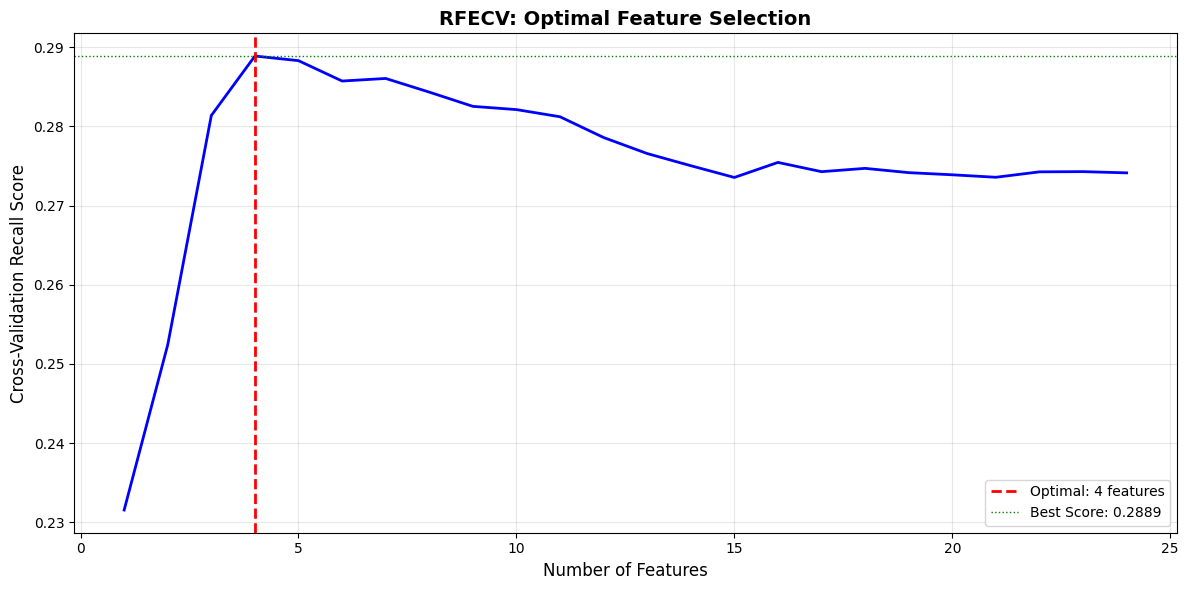

 Optimal features identified: 4


In [204]:
# Plot: Number of features vs Cross-validation score
plt.figure(figsize=(12, 6))
 
# Get scores for each number of features
n_features_range = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)
scores = rfecv.cv_results_['mean_test_score']
 
plt.plot(n_features_range, scores, linewidth=2, color='blue')
plt.axvline(x=rfecv.n_features_, color='red', linestyle='--',
            label=f'Optimal: {rfecv.n_features_} features', linewidth=2)
plt.axhline(y=scores.max(), color='green', linestyle=':',
            label=f'Best Score: {scores.max():.4f}', linewidth=1)
 
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Cross-Validation Recall Score', fontsize=12)
plt.title('RFECV: Optimal Feature Selection', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
 
print(f" Optimal features identified: {rfecv.n_features_}")

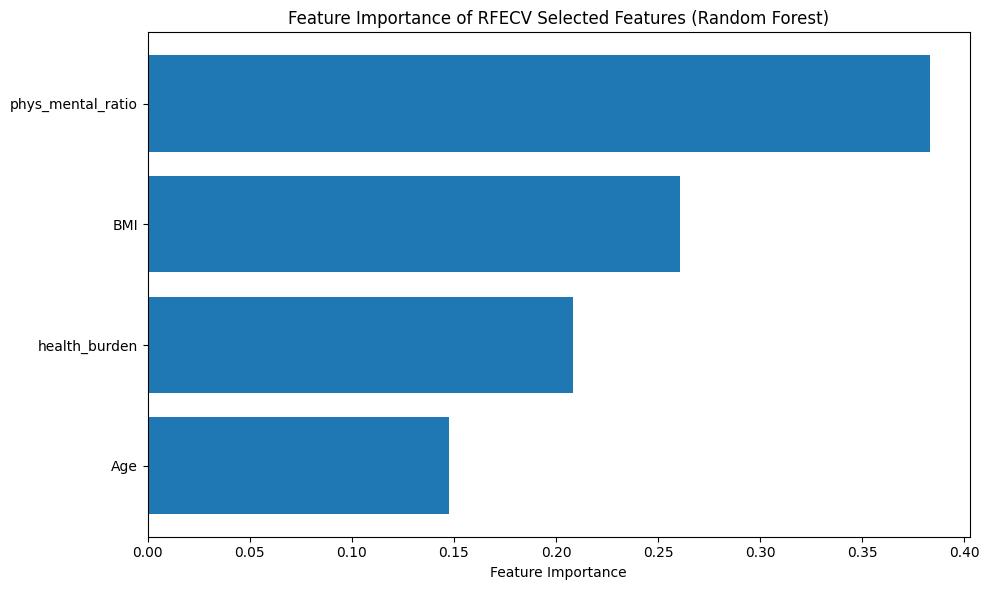

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance["feature"],
    feature_importance["importance"]
)
plt.gca().invert_yaxis()  # Most important at top
plt.xlabel("Feature Importance")
plt.title("Feature Importance of RFECV Selected Features (Random Forest)")
plt.tight_layout()
plt.show()


In [206]:
X_test_sel = X_test[selected_features].sample(
    n=500,
    random_state=42
)

In [207]:
import shap

explainer = shap.TreeExplainer(final_rf)
shap_values = explainer.shap_values(X_test_sel)

In [208]:
len(shap_values) == 3


False

In [209]:
shap_values.shape


(500, 4, 3)

In [210]:
# SHAP values for class 1
shap_class1 = shap_values[:, :, 1]


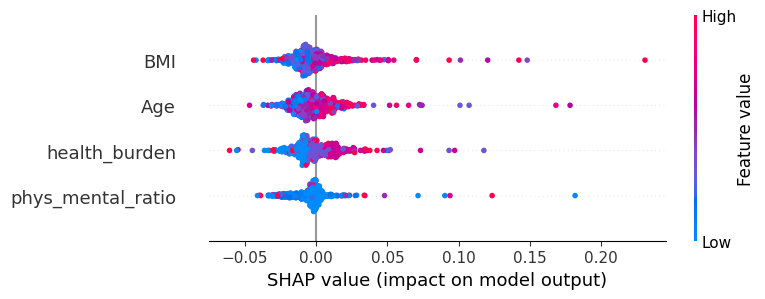

In [211]:
shap.summary_plot(
    shap_class1,          # class 1
    X_test_sel,
    feature_names=selected_features
)


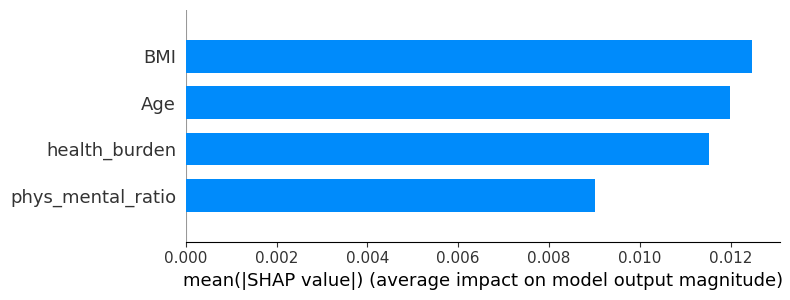

In [212]:
shap.summary_plot(
    shap_class1,
    X_test_sel,
    feature_names=selected_features,
    plot_type="bar"
)


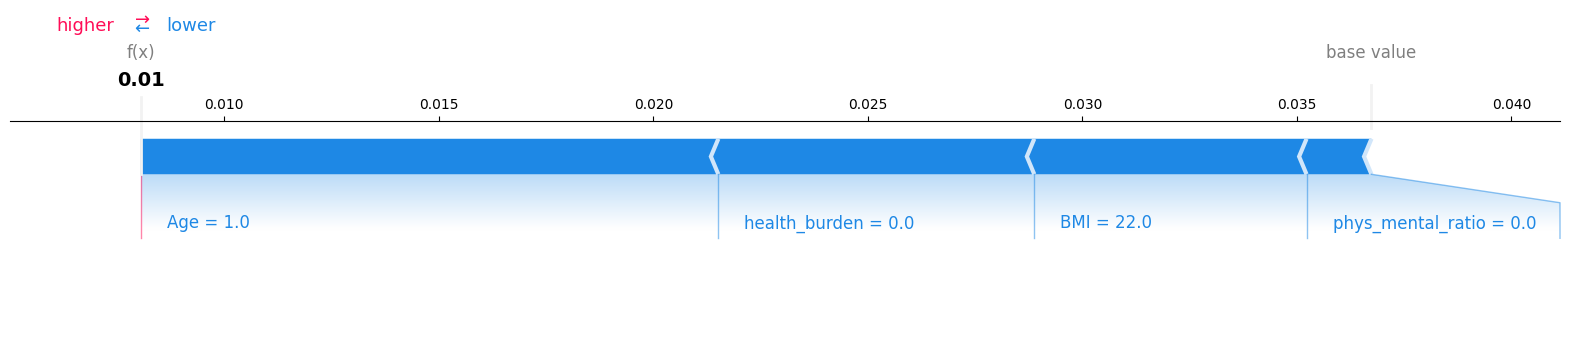

In [213]:
i = 0  # any test sample index

shap.force_plot(
    explainer.expected_value[1],
    shap_class1[i],
    X_test_sel.iloc[i],
    matplotlib=True
)


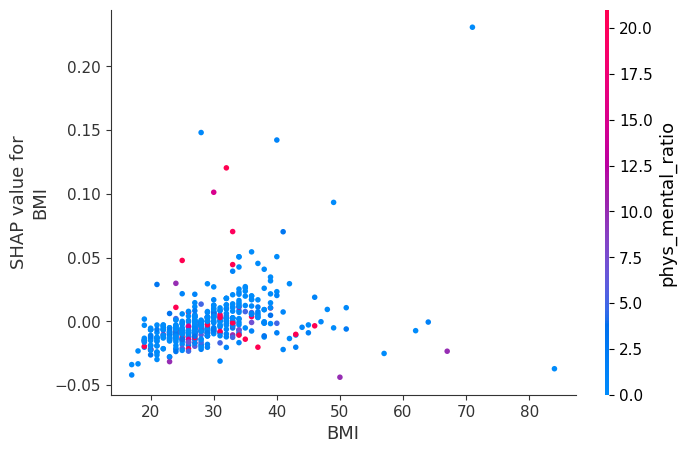

In [214]:
shap.dependence_plot(
    "BMI",
    shap_class1,
    X_test_sel,
    feature_names=selected_features
)


In [215]:

n_classes = len(np.unique(y_train))  # automatically get number of classes

xgb_estimator_multi = XGBClassifier(
    n_estimators=300,
    max_depth=15,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",   # multiclass
    num_class=n_classes,
    random_state=42,
    n_jobs=-1,
    eval_metric="mlogloss"
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

pipe_xgb_multi = Pipeline([
    ("rfecv", RFECV(
        estimator=xgb_estimator_multi,
        step=1,
        cv=cv,
        scoring=recall_priority_scorer,  # prioritise class 1 recall
        n_jobs=-1,
        verbose=1
    ))
])


pipe_xgb_multi.fit(X_train, y_train)

rfecv_xgb_multi = pipe_xgb_multi.named_steps["rfecv"]
selected_features_xgb = X_train.columns[rfecv_xgb_multi.support_]


feature_importance_xgb = pd.DataFrame({
    "feature": selected_features_xgb,
    "importance": rfecv_xgb_multi.estimator_.feature_importances_
}).sort_values("importance", ascending=False)

print(feature_importance_xgb)


Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
              feature  importance
1           CholCheck    0.120096
12      health_burden    0.115315
7             GenHlth    0.080027
4   HvyAlcoholConsump    0.077067
0              HighBP    0.072316
5       AnyHealthcare    0.056306
2                 BMI    0.056102
13  phys_mental_ratio    0.056100
10                Age    0.053915
14        care_access    0.053497
9            PhysHlth    0.053117
8            MentHlth    0.053091
3              Stroke    0.051831
6         NoDocbcCost    0.051259
11             Income    0.049961


In [216]:
feature_cols = [c for c in X.columns]

In [217]:
rfecv_xgb_multi.fit(X_train, y_train)
 
print(" RFECV COMPLETE! \n")

print(f"\nOptimal number of features: {rfecv_xgb_multi.n_features_}")
print(f"Features removed: {len(feature_cols) - rfecv_xgb_multi.n_features_}")
print(f"\nBest cross-validation score (Recall): {rfecv_xgb_multi.cv_results_['mean_test_score'].max():.4f}")

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
 RFECV COMPLETE! 


Optimal number of features: 15
Features removed: 9

Best cross-validation score (Recall): 0.2894


In [218]:
# Get selected features
selected_features_xgb = [f for f, selected in zip(feature_cols, rfecv_xgb_multi.support_) if selected]
removed_features_xgb = [f for f, selected in zip(feature_cols, rfecv_xgb_multi.support_) if not selected]
 
print("Selected Features")
print("=" * 60)
print(f"Total selected: {len(selected_features_xgb)}\n")
for i, feat in enumerate(selected_features_xgb, 1):
    print(f"{i:2d}. {feat}")
 
print("\n" + "=" * 60)
print("Removed Features")
print("=" * 60)
print(f"Total removed: {len(removed_features_xgb)}\n")
for i, feat in enumerate(removed_features_xgb, 1):
    print(f"{i:2d}. {feat}")

Selected Features
Total selected: 15

 1. HighBP
 2. CholCheck
 3. BMI
 4. Stroke
 5. HvyAlcoholConsump
 6. AnyHealthcare
 7. NoDocbcCost
 8. GenHlth
 9. MentHlth
10. PhysHlth
11. Age
12. Income
13. health_burden
14. phys_mental_ratio
15. care_access

Removed Features
Total removed: 9

 1. HighChol
 2. Smoker
 3. HeartDiseaseorAttack
 4. PhysActivity
 5. Fruits
 6. Veggies
 7. Sex
 8. Education
 9. lifestyle_risk


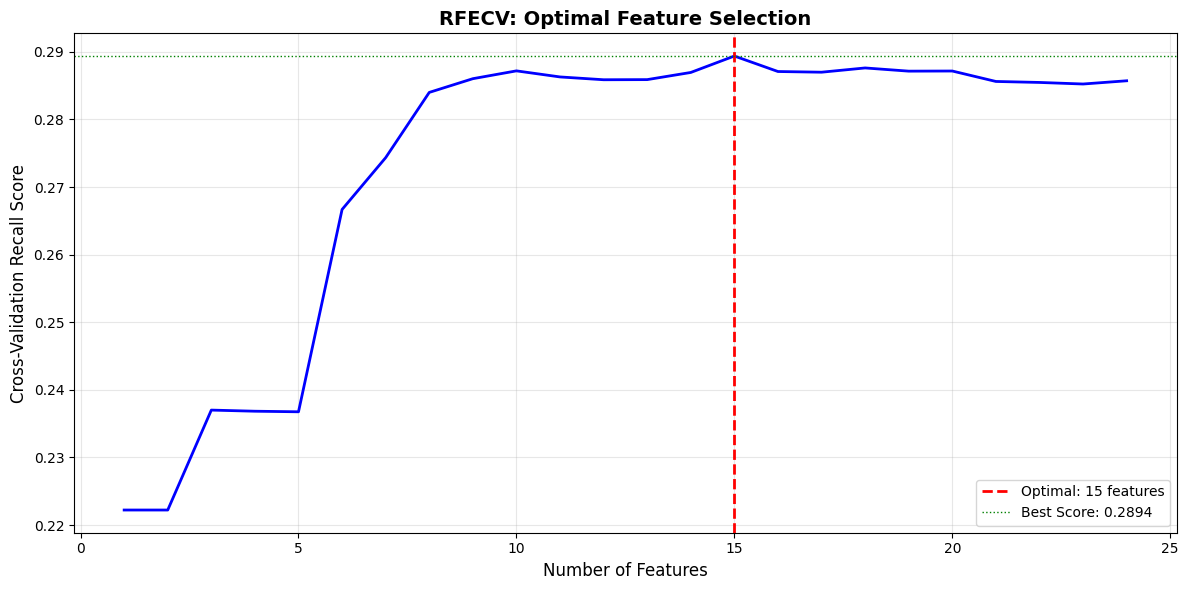

 Optimal features identified: 15


In [219]:
# Plot: Number of features vs Cross-validation score
plt.figure(figsize=(12, 6))
 
# Get scores for each number of features
n_features_range_xgb = range(1, len(rfecv_xgb_multi.cv_results_['mean_test_score']) + 1)
scores_xgb = rfecv_xgb_multi.cv_results_['mean_test_score']
 
plt.plot(n_features_range_xgb, scores_xgb, linewidth=2, color='blue')
plt.axvline(x=rfecv_xgb_multi.n_features_, color='red', linestyle='--',
            label=f'Optimal: {rfecv_xgb_multi.n_features_} features', linewidth=2)
plt.axhline(y=scores_xgb.max(), color='green', linestyle=':',
            label=f'Best Score: {scores_xgb.max():.4f}', linewidth=1)
 
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Cross-Validation Recall Score', fontsize=12)
plt.title('RFECV: Optimal Feature Selection', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
 
print(f" Optimal features identified: {rfecv_xgb_multi.n_features_}")

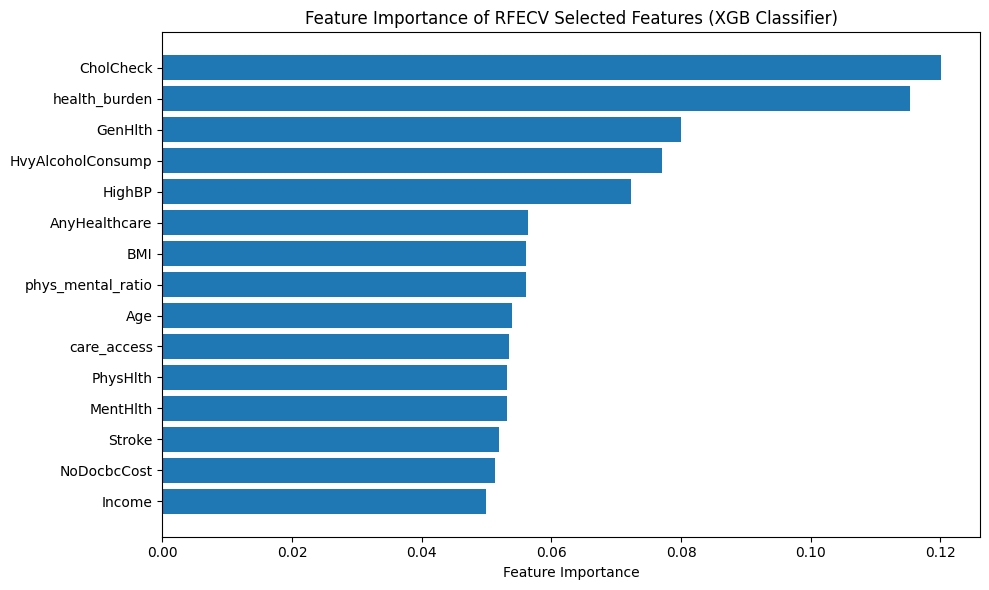

In [220]:
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_xgb["feature"],
    feature_importance_xgb["importance"]
)
plt.gca().invert_yaxis()  # Most important at top
plt.xlabel("Feature Importance")
plt.title("Feature Importance of RFECV Selected Features (XGB Classifier)")
plt.tight_layout()
plt.show()


In [221]:
df_model = df_import[selected_features_xgb]

In [222]:
df_model

,HighBP,CholCheck,BMI,Stroke,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,Age,Income,health_burden,phys_mental_ratio,care_access
0,1.0,1.0,40.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,9.0,3.0,2.0,0.789474,2.0
1,0.0,0.0,25.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,1.0,0.0,0.000000,-1.0
2,1.0,1.0,28.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,9.0,8.0,2.0,0.967742,1.0
3,1.0,1.0,27.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,6.0,1.0,0.000000,2.0
4,1.0,1.0,24.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,11.0,4.0,2.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0,5.0,7.0,2.0,5.000000,2.0
253676,1.0,1.0,18.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,11.0,4.0,2.0,0.000000,2.0
253677,0.0,1.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.000000,2.0
253678,1.0,1.0,23.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,7.0,1.0,1.0,0.000000,2.0


In [223]:
X_model = df_model

In [224]:
X_model

,HighBP,CholCheck,BMI,Stroke,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,Age,Income,health_burden,phys_mental_ratio,care_access
0,1.0,1.0,40.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,9.0,3.0,2.0,0.789474,2.0
1,0.0,0.0,25.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,1.0,0.0,0.000000,-1.0
2,1.0,1.0,28.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,9.0,8.0,2.0,0.967742,1.0
3,1.0,1.0,27.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,6.0,1.0,0.000000,2.0
4,1.0,1.0,24.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,11.0,4.0,2.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0,5.0,7.0,2.0,5.000000,2.0
253676,1.0,1.0,18.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,11.0,4.0,2.0,0.000000,2.0
253677,0.0,1.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.000000,2.0
253678,1.0,1.0,23.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,7.0,1.0,1.0,0.000000,2.0


In [225]:
y_model = df_import["Diabetes_012"]

In [226]:
y_model

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 229781, dtype: float64

In [227]:
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_model, y_model, test_size=0.2, random_state=42, stratify=y_model)

In [228]:
X_train_model.isna().sum()

HighBP               0
CholCheck            0
BMI                  0
Stroke               0
HvyAlcoholConsump    0
AnyHealthcare        0
NoDocbcCost          0
GenHlth              0
MentHlth             0
PhysHlth             0
Age                  0
Income               0
health_burden        0
phys_mental_ratio    0
care_access          0
dtype: int64

In [229]:

# Custom F2 scorer for multiclass
f2_scorer_multi = make_scorer(fbeta_score, beta=2, average='weighted')

# Number of classes
n_classes = len(np.unique(y_train_model))

def objective_xgb_multiclass(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),

        # MULTICLASS settings
        "objective": "multi:softprob",
        "num_class": n_classes,
        "random_state": 42,
        "n_jobs": -1,
        "eval_metric": "mlogloss",
        "class_weight": {

        }
    }

    xgb_class = XGBClassifier(**param)
    
    # Use StratifiedKFold for multiclass
    cv_class = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Compute F2 score (weighted across classes)
    scores_class = cross_val_score(
        xgb_class, X_train_model, y_train_model, 
        cv=cv_class, 
        scoring=recall_priority_scorer, 
        n_jobs=-1
    )

    return scores_class.mean()

# Optuna study
study_xgb_multiclass = optuna.create_study(direction="maximize", study_name="XGBClassifier_F2_Multiclass")
study_xgb_multiclass.optimize(objective_xgb_multiclass, n_trials=100, show_progress_bar=True)

print("Best F2-Score:", study_xgb_multiclass.best_value)
print("Best params:", study_xgb_multiclass.best_params)


[I 2026-02-07 16:41:21,570] A new study created in memory with name: XGBClassifier_F2_Multiclass


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-02-07 16:41:50,950] Trial 0 finished with value: 0.27040394398150136 and parameters: {'n_estimators': 1102, 'max_depth': 4, 'learning_rate': 0.043571613104849555, 'min_child_weight': 5, 'gamma': 4.929624362419205, 'subsample': 0.8927504891836409, 'colsample_bytree': 0.9989209273841334, 'reg_alpha': 0.002552353043849084, 'reg_lambda': 0.43168863313765726}. Best is trial 0 with value: 0.27040394398150136.
[I 2026-02-07 16:42:19,229] Trial 1 finished with value: 0.2743587325642515 and parameters: {'n_estimators': 772, 'max_depth': 14, 'learning_rate': 0.02634199671753332, 'min_child_weight': 1, 'gamma': 3.7686271768909956, 'subsample': 0.7085474396535486, 'colsample_bytree': 0.8601780385981874, 'reg_alpha': 6.247127473941376, 'reg_lambda': 0.01114720838308382}. Best is trial 1 with value: 0.2743587325642515.
[I 2026-02-07 16:42:42,476] Trial 2 finished with value: 0.27564014261195713 and parameters: {'n_estimators': 744, 'max_depth': 8, 'learning_rate': 0.11350580246211588, 'min_c

In [230]:
best_xgb_class = XGBClassifier(
    **study_xgb_multiclass.best_params,
    objective='multi:softprob',
    random_state=42,
    n_jobs=-1
)

best_xgb_class.fit(X_train_model, y_train_model)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8327217959369663
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [251]:

# Predictions
y_pred_xgb_class = best_xgb_class.predict(X_test_model)

# Probabilities needed for multiclass ROC-AUC
y_pred_proba_xgb = best_xgb_class.predict_proba(X_test_model)

# Metrics
acc = accuracy_score(y_test_model, y_pred_xgb_class)

pre = precision_score(
    y_test_model,
    y_pred_xgb_class,
    average='macro',   # handles class imbalance
    zero_division=0
)

rec = recall_score(
    y_test_model,
    y_pred_xgb_class,
    average='macro',
    zero_division=0
)

f1 = f1_score(
    y_test_model,
    y_pred_xgb_class,
    average='macro'
)

f2 = fbeta_score(
    y_test_model,
    y_pred_xgb_class,
    beta=2,
    average='macro'
)

# Multiclass ROC-AUC (OvR is standard)
roc = roc_auc_score(
    y_test_model,
    y_pred_proba_xgb,
    multi_class='ovr',
    average='macro'
)

print("Accuracy: ", acc)
print("Precision (weighted): ", pre)
print("Recall (weighted): ", rec)
print("F1 Score (weighted): ", f1)
print("F2 Score (weighted): ", f2)
print("ROC AUC (OvR, weighted): ", roc)

Accuracy:  0.8011619557412364
Precision (weighted):  0.4118906778757065
Recall (weighted):  0.3948954703261598
F1 Score (weighted):  0.39930795524213
F2 Score (weighted):  0.3959687776516459
ROC AUC (OvR, weighted):  0.6800621081023719


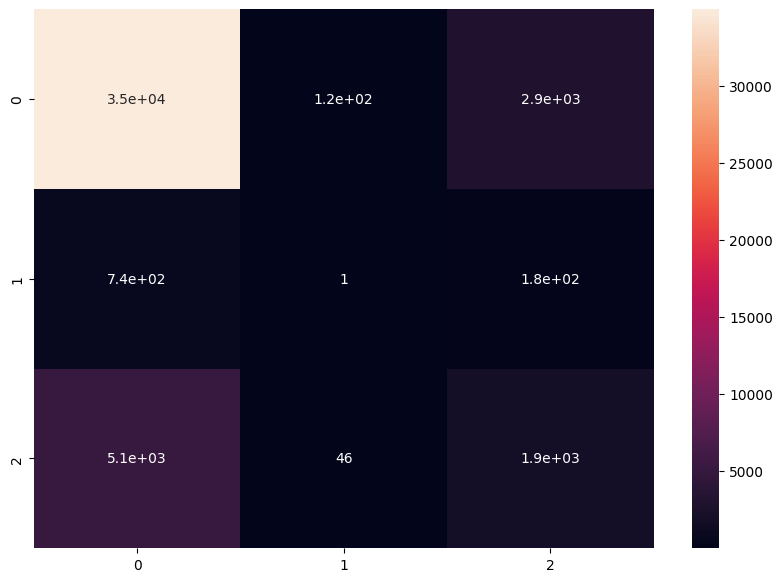

In [252]:
cm = confusion_matrix(y_test_model, y_pred_xgb_class)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.show()

In [253]:
print(cm)

[[34967   121  2924]
 [  742     1   183]
 [ 5122    46  1851]]


In [254]:
cr = classification_report(y_test_model, y_pred_xgb_class)
print(cr)


              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     38012
         1.0       0.01      0.00      0.00       926
         2.0       0.37      0.26      0.31      7019

    accuracy                           0.80     45957
   macro avg       0.41      0.39      0.40     45957
weighted avg       0.77      0.80      0.78     45957



In [255]:
def macro_f2_no_collapse(y_true, y_pred):
    recalls = recall_score(y_true, y_pred, average=None, zero_division=0)

    # Reject models that ignore any class
    if (recalls == 0).any():
        return 0.0

    return fbeta_score(y_true, y_pred, beta=2, average="macro")

f2_macro_scorer = make_scorer(macro_f2_no_collapse)


In [236]:
from sklearn.multiclass import OneVsRestClassifier

def objective_rf_multiclass(trial):

    rf_params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 15),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "class_weight": "balanced_subsample",
        "random_state": 42,
        "n_jobs": -1
    }

    base_rf = RandomForestClassifier(**rf_params)
    model = OneVsRestClassifier(base_rf)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(
        model,
        X_train_model,
        y_train_model,
        cv=cv,
        scoring=f2_macro_scorer,
        n_jobs=-1
    )

    return scores.mean()
    
study_rf = optuna.create_study(
    direction="maximize",
    study_name="RF_OvR_MacroF2_NoCollapse"
)

study_rf.optimize(
    objective_rf_multiclass,
    n_trials=100,
    show_progress_bar=True
)

print("Best Macro F2:", study_rf.best_value)
print("Best params:", study_rf.best_params)



[I 2026-02-07 18:11:30,367] A new study created in memory with name: RF_OvR_MacroF2_NoCollapse


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-02-07 18:11:51,506] Trial 0 finished with value: 0.46096788981568554 and parameters: {'n_estimators': 204, 'max_depth': 16, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.46096788981568554.
[I 2026-02-07 18:12:46,555] Trial 1 finished with value: 0.45819610824114243 and parameters: {'n_estimators': 600, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.46096788981568554.
[I 2026-02-07 18:13:35,858] Trial 2 finished with value: 0.4604995323319173 and parameters: {'n_estimators': 461, 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.46096788981568554.
[I 2026-02-07 18:14:47,222] Trial 3 finished with value: 0.45926749628640595 and parameters: {'n_estimators': 704, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.46096

In [237]:
best_rf_class = OneVsRestClassifier(
    RandomForestClassifier(
        **study_rf.best_params,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    )
)

best_rf_class.fit(X_train_model, y_train_model)


,estimator,RandomForestC...ndom_state=42)
,n_jobs,None
,verbose,0
,n_estimators,412
,criterion,'gini'
,max_depth,16
,min_samples_split,4
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None


In [238]:

# Predictions
y_pred_rf_class = best_rf_class.predict(X_test_model)

# Probabilities needed for multiclass ROC-AUC
y_pred_proba_rf = best_rf_class.predict_proba(X_test_model)

# Metrics
acc_rf = accuracy_score(y_test_model, y_pred_rf_class)

pre_rf = precision_score(
    y_test_model,
    y_pred_rf_class,
    average='macro',   # handles class imbalance
    zero_division=0
)

rec_rf = recall_score(
    y_test_model,
    y_pred_rf_class,
    average='macro',
    zero_division=0
)

f1_rf = f1_score(
    y_test_model,
    y_pred_rf_class,
    average='macro'
)

f2_rf = fbeta_score(
    y_test_model,
    y_pred_rf_class,
    beta=2,
    average='macro'
)

# Multiclass ROC-AUC (OvR is standard)
roc_rf = roc_auc_score(
    y_test_model,
    y_pred_proba_rf,
    multi_class='ovo',
    average='macro'
)

print("Accuracy: ", acc_rf)
print("Precision (weighted): ", pre_rf)
print("Recall (macro): ", rec_rf)
print("F1 Score (weighted): ", f1_rf)
print("F2 Score (macro): ", f2_rf)
print("ROC AUC (OvR, macro): ", roc_rf)

Accuracy:  0.7259612246230172
Precision (weighted):  0.43441759220083664
Recall (macro):  0.4917440437873244
F1 Score (weighted):  0.442259240745078
F2 Score (macro):  0.4644058243556654
ROC AUC (OvR, macro):  0.6816157534125887


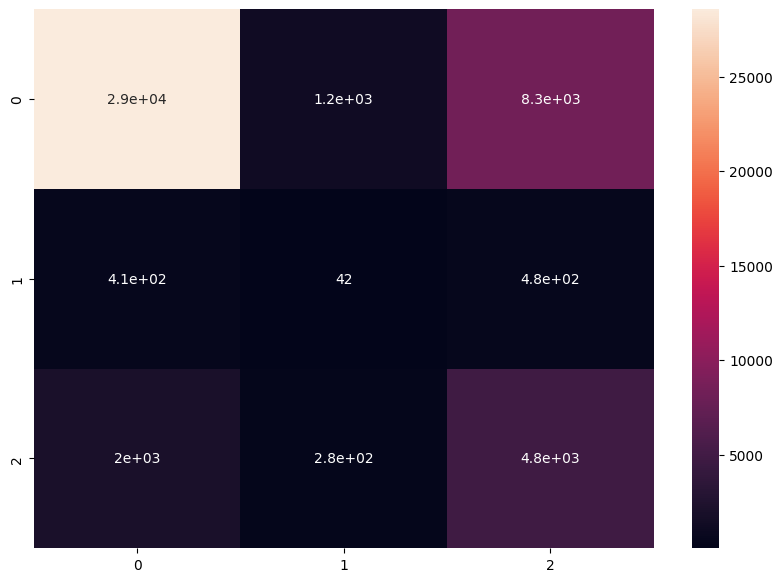

In [239]:
cm_rf_ovr = confusion_matrix(y_test_model, y_pred_rf_class)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf_ovr, annot=True)
plt.show()

In [240]:
print(cm_rf_ovr)

[[28558  1168  8286]
 [  407    42   477]
 [ 1981   275  4763]]


In [241]:
def objective_rf_multiclass(trial):
    # Hyperparameter search space for Random Forest
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "class_weight": {
            0: 1.0,
            1: 4.0,
            2: 2.5
        },  # important for imbalanced multiclass
        "random_state": 42,
        "n_jobs": -1
    }

    rf_class = RandomForestClassifier(**param)

    # Stratified CV
    cv_class = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Evaluate using weighted recall scorer
    scores_class = cross_val_score(
        rf_class,
        X_train_model,
        y_train_model,
        cv=cv_class,
        scoring=f2_scorer_multi,
        n_jobs=-1
    )

    return scores_class.mean()

study_rf_multiclass = optuna.create_study(
    direction="maximize",
    study_name="RFClassifier_WeightedRecall_Multiclass"
)

study_rf_multiclass.optimize(
    objective_rf_multiclass,
    n_trials=100,  # adjust depending on compute
    show_progress_bar=True
)

print("Best weighted recall:", study_rf_multiclass.best_value)
print("Best params:", study_rf_multiclass.best_params)

[I 2026-02-07 20:07:54,526] A new study created in memory with name: RFClassifier_WeightedRecall_Multiclass


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-02-07 20:08:22,246] Trial 0 finished with value: 0.8039996303241971 and parameters: {'n_estimators': 688, 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.8039996303241971.
[I 2026-02-07 20:08:54,265] Trial 1 finished with value: 0.802045608392173 and parameters: {'n_estimators': 640, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8039996303241971.
[I 2026-02-07 20:09:08,335] Trial 2 finished with value: 0.8119743376201984 and parameters: {'n_estimators': 652, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 0.8119743376201984.
[I 2026-02-07 20:10:36,976] Trial 3 finished with value: 0.7744870624226016 and parameters: {'n_estimators': 755, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_featur

In [242]:
best_rf_class = RandomForestClassifier(
    **study_rf_multiclass.best_params,
    random_state=42,
    n_jobs=-1
)

best_rf_class.fit(X_train_model, y_train_model)


,n_estimators,684
,criterion,'gini'
,max_depth,3
,min_samples_split,19
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [247]:

# Predictions
y_pred_rf_class = best_rf_class.predict(X_test_model)

# Probabilities needed for multiclass ROC-AUC
y_pred_proba_rf = best_rf_class.predict_proba(X_test_model)

# Metrics
acc_rf = accuracy_score(y_test_model, y_pred_rf_class)

pre_rf = precision_score(
    y_test_model,
    y_pred_rf_class,
    average='macro',   # handles class imbalance
    zero_division=0
)

rec_rf = recall_score(
    y_test_model,
    y_pred_rf_class,
    average='macro',
    zero_division=0
)

f1_rf = f1_score(
    y_test_model,
    y_pred_rf_class,
    average='macro'
)

f2_rf = fbeta_score(
    y_test_model,
    y_pred_rf_class,
    beta=2,
    average='macro'
)

# Multiclass ROC-AUC (OvR is standard)
roc_rf = roc_auc_score(
    y_test_model,
    y_pred_proba_rf,
    multi_class='ovo',
    average='macro'
)

print("Accuracy: ", acc_rf)
print("Precision (weighted): ", pre_rf)
print("Recall (weighted): ", rec_rf)
print("F1 Score (weighted): ", f1_rf)
print("F2 Score (weighted): ", f2_rf)
print("ROC AUC (OvR, weighted): ", roc_rf)

Accuracy:  0.8271210044171726
Precision (weighted):  0.27570700147239086
Recall (weighted):  0.3333333333333333
F1 Score (weighted):  0.3017939160086857
F2 Score (weighted):  0.3199582502125367
ROC AUC (OvR, weighted):  0.6725637412118033


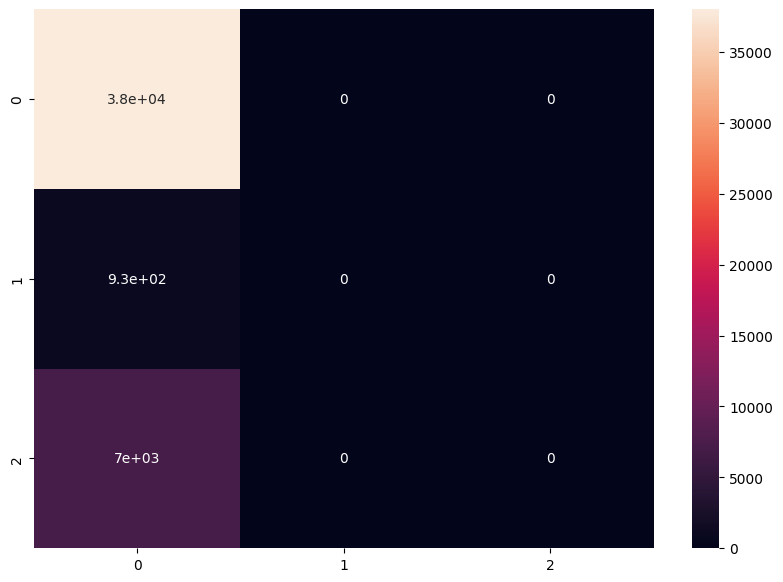

In [248]:
cm_rf = confusion_matrix(y_test_model, y_pred_rf_class)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True)
plt.show()

In [249]:
print(cm_rf)

[[38012     0     0]
 [  926     0     0]
 [ 7019     0     0]]


In [250]:
cr_rf = classification_report(y_test_model, y_pred_rf_class)
print(cr_rf)


              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.00      0.00      0.00      7019

    accuracy                           0.83     45957
   macro avg       0.28      0.33      0.30     45957
weighted avg       0.68      0.83      0.75     45957



c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

In [256]:
def objective_rf_ovr(trial):
    # Hyperparameter search space for Random Forest
    rf_params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "class_weight": {0: 1.0, 1: 4.0, 2: 2.5},  # important for imbalanced multiclass
        "random_state": 42,
        "n_jobs": -1
    }

    # Wrap Random Forest in One-vs-Rest
    rf_class = RandomForestClassifier(**rf_params)
    ovr_clf = OneVsRestClassifier(rf_class, n_jobs=-1)

    # Stratified CV
    cv_class = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Evaluate using your custom weighted recall scorer
    scores_class = cross_val_score(
        ovr_clf,
        X_train_model,
        y_train_model,
        cv=cv_class,
        scoring=f2_scorer_multi,
        n_jobs=-1
    )

    return scores_class.mean()


# Optuna study
study_rf_ovr = optuna.create_study(
    direction="maximize",
    study_name="RF_OvR_WeightedRecall_Multiclass"
)

study_rf_ovr.optimize(
    objective_rf_ovr,
    n_trials=100,  # adjust depending on compute
    show_progress_bar=True
)

print("Best weighted recall:", study_rf_ovr.best_value)
print("Best params:", study_rf_ovr.best_params)


[I 2026-02-08 07:48:29,155] A new study created in memory with name: RF_OvR_WeightedRecall_Multiclass


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-02-08 07:48:55,359] Trial 0 finished with value: 0.8096227499877836 and parameters: {'n_estimators': 269, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8096227499877836.
[I 2026-02-08 07:49:16,874] Trial 1 finished with value: 0.7948701637171542 and parameters: {'n_estimators': 445, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.8096227499877836.
[I 2026-02-08 07:49:42,642] Trial 2 finished with value: 0.8063433830653611 and parameters: {'n_estimators': 428, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8096227499877836.
[I 2026-02-08 07:50:44,871] Trial 3 finished with value: 0.8117168545876122 and parameters: {'n_estimators': 758, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_featu

In [257]:
best_rf = RandomForestClassifier(
    **study_rf_ovr.best_params,
    random_state=42,
    n_jobs=-1
)

# Wrap it in One-vs-Rest
best_rf_ovr = OneVsRestClassifier(best_rf, n_jobs=-1)

# Fit on the full training data
best_rf_ovr.fit(X_train_model, y_train_model)

,estimator,RandomForestC...ndom_state=42)
,n_jobs,-1
,verbose,0
,n_estimators,353
,criterion,'gini'
,max_depth,13
,min_samples_split,12
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None


In [258]:

# Predictions
y_pred_rf_ovr  = best_rf_ovr.predict(X_test_model)

# Probabilities needed for multiclass ROC-AUC
y_pred_proba_rf_ovr = best_rf_ovr.predict_proba(X_test_model)

# Metrics
acc_rf_ovr = accuracy_score(y_test_model, y_pred_rf_ovr)

pre_rf_ovr = precision_score(
    y_test_model,
    y_pred_rf_ovr,
    average='macro',   # handles class imbalance
    zero_division=0
)

rec_rf_ovr = recall_score(
    y_test_model,
    y_pred_rf_ovr,
    average='macro',
    zero_division=0
)

f1_rf_ovr = f1_score(
    y_test_model,
    y_pred_rf_ovr,
    average='macro'
)

f2_rf_ovr = fbeta_score(
    y_test_model,
    y_pred_rf_ovr,
    beta=2,
    average='macro'
)

# Multiclass ROC-AUC (OvR is standard)
roc_rf_ovr = roc_auc_score(
    y_test_model,
    y_pred_proba_rf_ovr,
    multi_class='ovo',
    average='macro'
)

print("Accuracy: ", acc_rf_ovr)
print("Precision (weighted): ", pre_rf_ovr)
print("Recall (weighted): ", rec_rf_ovr)
print("F1 Score (weighted): ", f1_rf_ovr)
print("F2 Score (weighted): ", f2_rf_ovr)
print("ROC AUC (OvR, weighted): ", roc_rf_ovr)

Accuracy:  0.8355201601497052
Precision (weighted):  0.47285873942875
Recall (weighted):  0.3841514361751206
F1 Score (weighted):  0.391962332644951
F2 Score (weighted):  0.3838782825245229
ROC AUC (OvR, weighted):  0.6837546256504036


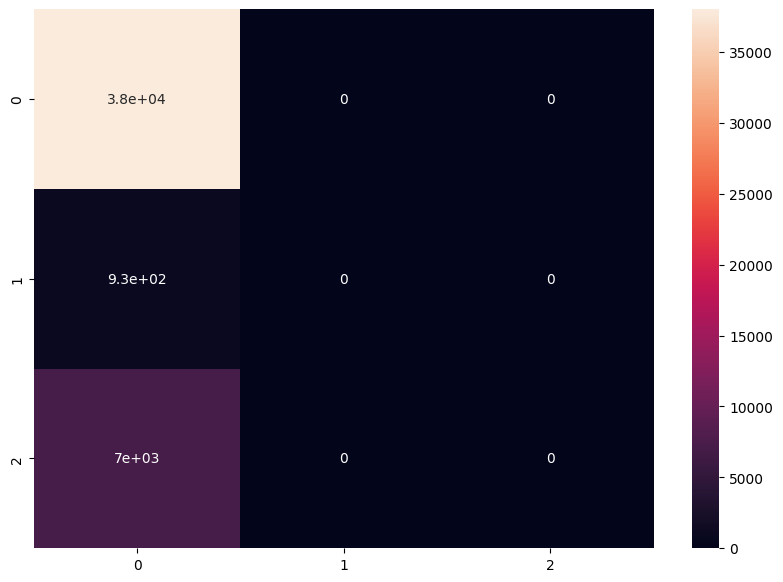

In [259]:
cm_rf = confusion_matrix(y_test_model, y_pred_rf_class)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True)
plt.show()

In [260]:
print(cm_rf)

[[38012     0     0]
 [  926     0     0]
 [ 7019     0     0]]


In [261]:
cr_rf = classification_report(y_test_model, y_pred_rf_class)
print(cr_rf)


              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.00      0.00      0.00      7019

    accuracy                           0.83     45957
   macro avg       0.28      0.33      0.30     45957
weighted avg       0.68      0.83      0.75     45957



c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

In [262]:
def objective_xgb_multiclass(trial):

    xgb_params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 10),

        # IMPORTANT
        "objective": "binary:logistic",  # OvR → binary per class
        "eval_metric": "logloss",
        "tree_method": "hist",
        "random_state": 42,
        "n_jobs": -1
    }

    base_xgb = XGBClassifier(**xgb_params)
    model = OneVsRestClassifier(base_xgb)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(
        model,
        X_train_model,
        y_train_model,
        cv=cv,
        scoring=f2_macro_scorer,
        n_jobs=-1
    )

    return scores.mean()

study_xgb_ovr = optuna.create_study(
    direction="maximize",
    study_name="XGB_OvR_MacroF2"
)

study_xgb_ovr.optimize(
    objective_xgb_multiclass,
    n_trials=100,
    show_progress_bar=True
)

print("Best Macro F2:", study_xgb_ovr.best_value)
print("Best params:", study_xgb_ovr.best_params)



[I 2026-02-08 11:07:10,969] A new study created in memory with name: XGB_OvR_MacroF2


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-02-08 11:07:48,923] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 505, 'max_depth': 9, 'learning_rate': 0.016845605016208638, 'subsample': 0.9209152051795425, 'colsample_bytree': 0.8367883901660133, 'min_child_weight': 2, 'gamma': 1.7127627684141218, 'reg_alpha': 4.15512428313983, 'reg_lambda': 7.317110819909171}. Best is trial 0 with value: 0.0.
[I 2026-02-08 11:08:07,582] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 612, 'max_depth': 5, 'learning_rate': 0.08075717539459006, 'subsample': 0.8943963711158869, 'colsample_bytree': 0.7699612461102584, 'min_child_weight': 6, 'gamma': 2.7017915098540124, 'reg_alpha': 2.8429050055651888, 'reg_lambda': 9.20225345308518}. Best is trial 0 with value: 0.0.
[I 2026-02-08 11:08:29,602] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 521, 'max_depth': 10, 'learning_rate': 0.02158031299782463, 'subsample': 0.8056923240865299, 'colsample_bytree': 0.7385846548414018, 'min_child_weight':

In [268]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

# Best params from Optuna
best_params_xgb_ovr = study_xgb_ovr.best_params.copy()

# Build base binary XGBoost (OvR expects binary)
base_xgb_1 = XGBClassifier(
    **best_params_xgb_ovr,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

# Wrap with One-vs-Rest
best_xgb_ovr = OneVsRestClassifier(
    base_xgb_1,
    n_jobs=-1
)

# Fit on full training data
best_xgb_ovr.fit(
    X_train_model,
    y_train_model
)


,estimator,"XGBClassifier...ree=None, ...)"
,n_jobs,-1
,verbose,0
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8367883901660133
,device,None


In [269]:
def apply_thresholds(proba, t1=0.12, t2=0.35):
    y_pred = []

    for p0, p1, p2 in proba:
        if p1 >= t1:
            y_pred.append(1)
        elif p2 >= t2:
            y_pred.append(2)
        else:
            y_pred.append(0)

    return np.array(y_pred)


In [270]:
y_pred_xgb_class_ovr = best_xgb_ovr.predict(X_test_model)
y_proba_xgb_ovr      = best_xgb_ovr.predict_proba(X_test_model)
acc_xgb_ovr          = accuracy_score(y_test_model, y_pred_xgb_class_ovr)
pre_xgb_ovr          = precision_score(y_test_model, y_pred_xgb_class_ovr, average='macro')
rec_xgb_ovr          = recall_score(y_test_model, y_pred_xgb_class_ovr, average='macro')
f1_xgb_ovr           = f1_score(y_test_model, y_pred_xgb_class_ovr, average='macro')
f2_xgb_ovr           = fbeta_score(y_test_model, y_pred_xgb_class_ovr, beta=2, average='macro')
roc_xgb_ovr          = roc_auc_score(
    y_test_model,
    y_proba_xgb_ovr,
    multi_class='ovr',
    average='macro'
)
print(f"Accuracy  : {acc_xgb_ovr:.4f}")
print(f"Precision : {pre_xgb_ovr:.4f}")
print(f"Recall    : {rec_xgb_ovr:.4f}")
print(f"F1 Score  : {f1_xgb_ovr:.4f}")
print(f"F2 Score  : {f2_xgb_ovr:.4f}")
print(f"ROC AUC   : {roc_xgb_ovr:.4f}")

Accuracy  : 0.8366
Precision : 0.4763
Recall    : 0.3860
F1 Score  : 0.3946
F2 Score  : 0.3860
ROC AUC   : 0.7731


c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [271]:
y_pred_thresh_xgb_ovr = apply_thresholds(
    y_proba_xgb_ovr,
    t1=0.05,
    t2=0.40
)
print(confusion_matrix(y_test_model, y_pred_thresh_xgb_ovr))
print("Macro Recall:", recall_score(y_test_model, y_pred_thresh_xgb_ovr, average="macro"))
print("Macro F2    :", fbeta_score(y_test_model, y_pred_thresh_xgb_ovr, beta=2, average="macro"))


[[35874   435  1703]
 [  753    34   139]
 [ 4714   291  2014]]
Macro Recall: 0.4224690424453925
Macro F2    : 0.42698295858332935


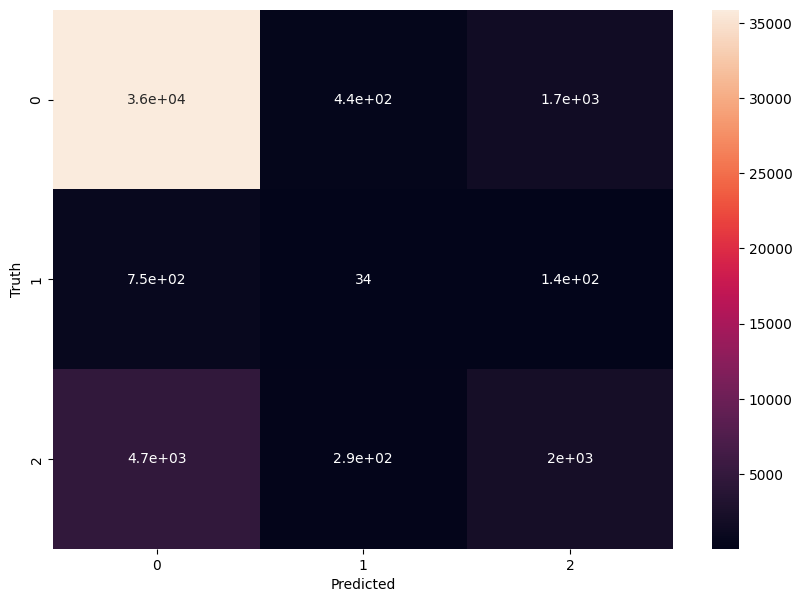

In [272]:
cm_xgb_ovr = confusion_matrix(y_test_model, y_pred_thresh_xgb_ovr)
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb_ovr, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()